*First compiled: September 14, 2017.*

# Plotting the ECLAIR results

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
sc.settings.verbosity = 1                          # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)              # low dots per inch yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+16.g8ae527b.dirty on 2017-09-22 14:16.


This notebook merely plots the results.

In [2]:
outdir = 'ECLAIR_instance/ECLAIR_ensemble_clustering_files/2017-09-15__09:09:31/'
labels = np.loadtxt(outdir + 'consensus_labels.txt').astype(int).astype(str)
adjacency = np.loadtxt(outdir + 'consensus_adjacency_matrix.txt')
variances = np.loadtxt(outdir + 'ensemble_distances_variances.txt')
distances = np.loadtxt(outdir + 'consensus_distances_matrix.txt')

In [3]:
adjacency

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.]])

In [4]:
variances

array([[ 0.      ,  0.998838,  0.998838,  0.      ],
       [ 0.998838,  0.      ,  0.      ,  0.      ],
       [ 0.998838,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ]])

In [5]:
distances

array([[ 0.    ,  3.9659,  1.9659,  2.9659],
       [ 3.9659,  0.    ,  2.    ,  1.    ],
       [ 1.9659,  2.    ,  0.    ,  1.    ],
       [ 2.9659,  1.    ,  1.    ,  0.    ]])

In [6]:
adata = sc.read('X_krumsiek11_scaled.txt')

reading X_krumsiek11_scaled.txt


In [7]:
sc.tl.draw_graph(adata)

In [8]:
adata.smp['eclair_clusters'] = labels

saving figure to file ./figures/draw_graph_fr_eclair_clusters.png


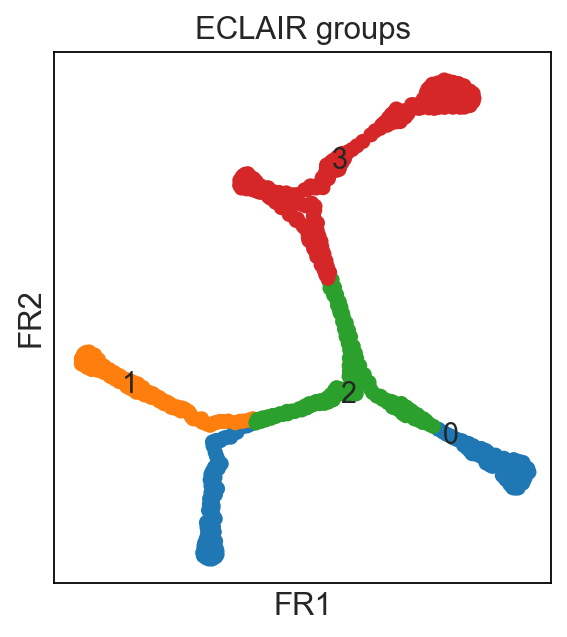

In [13]:
ax = sc.pl.draw_graph(adata, color='eclair_clusters', title='ECLAIR groups', legend_loc='on data', save='_eclair_clusters')

In [10]:
adata.add['eclair_adjacency'] = adjacency

saving figure to file ./figures/aga_graph_eclair_tree.png


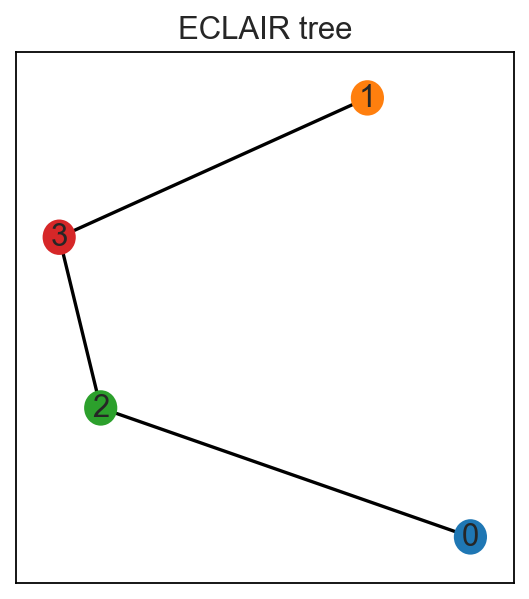

In [11]:
ax = sc.pl.aga_graph(adata, solid_edges='eclair_adjacency', groups='eclair_clusters', frameon=True,
                     dashed_edges=None, title='ECLAIR tree', save='_eclair_tree')